<a href="https://colab.research.google.com/github/myutiee/3AI1_Mutia_0110224131/blob/main/PraktikumMandiri_09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Praktikum_ML/Praktikum_9/Data/data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
df.tail()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
df.isnull().sum()

,0
id,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0


In [ ]:

df= df.drop(columns=['Unnamed: 32', 'id'], axis=1)


print(df.shape)

(569, 31)


In [ ]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [ ]:
df['diagnosis'].value_counts()

,count
diagnosis,
B,357
M,212


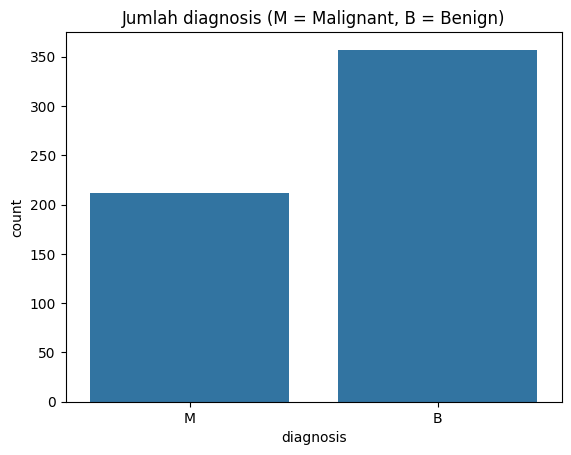

In [ ]:
sns.countplot(data=df, x='diagnosis')
plt.title('Jumlah diagnosis (M = Malignant, B = Benign)')
plt.show()

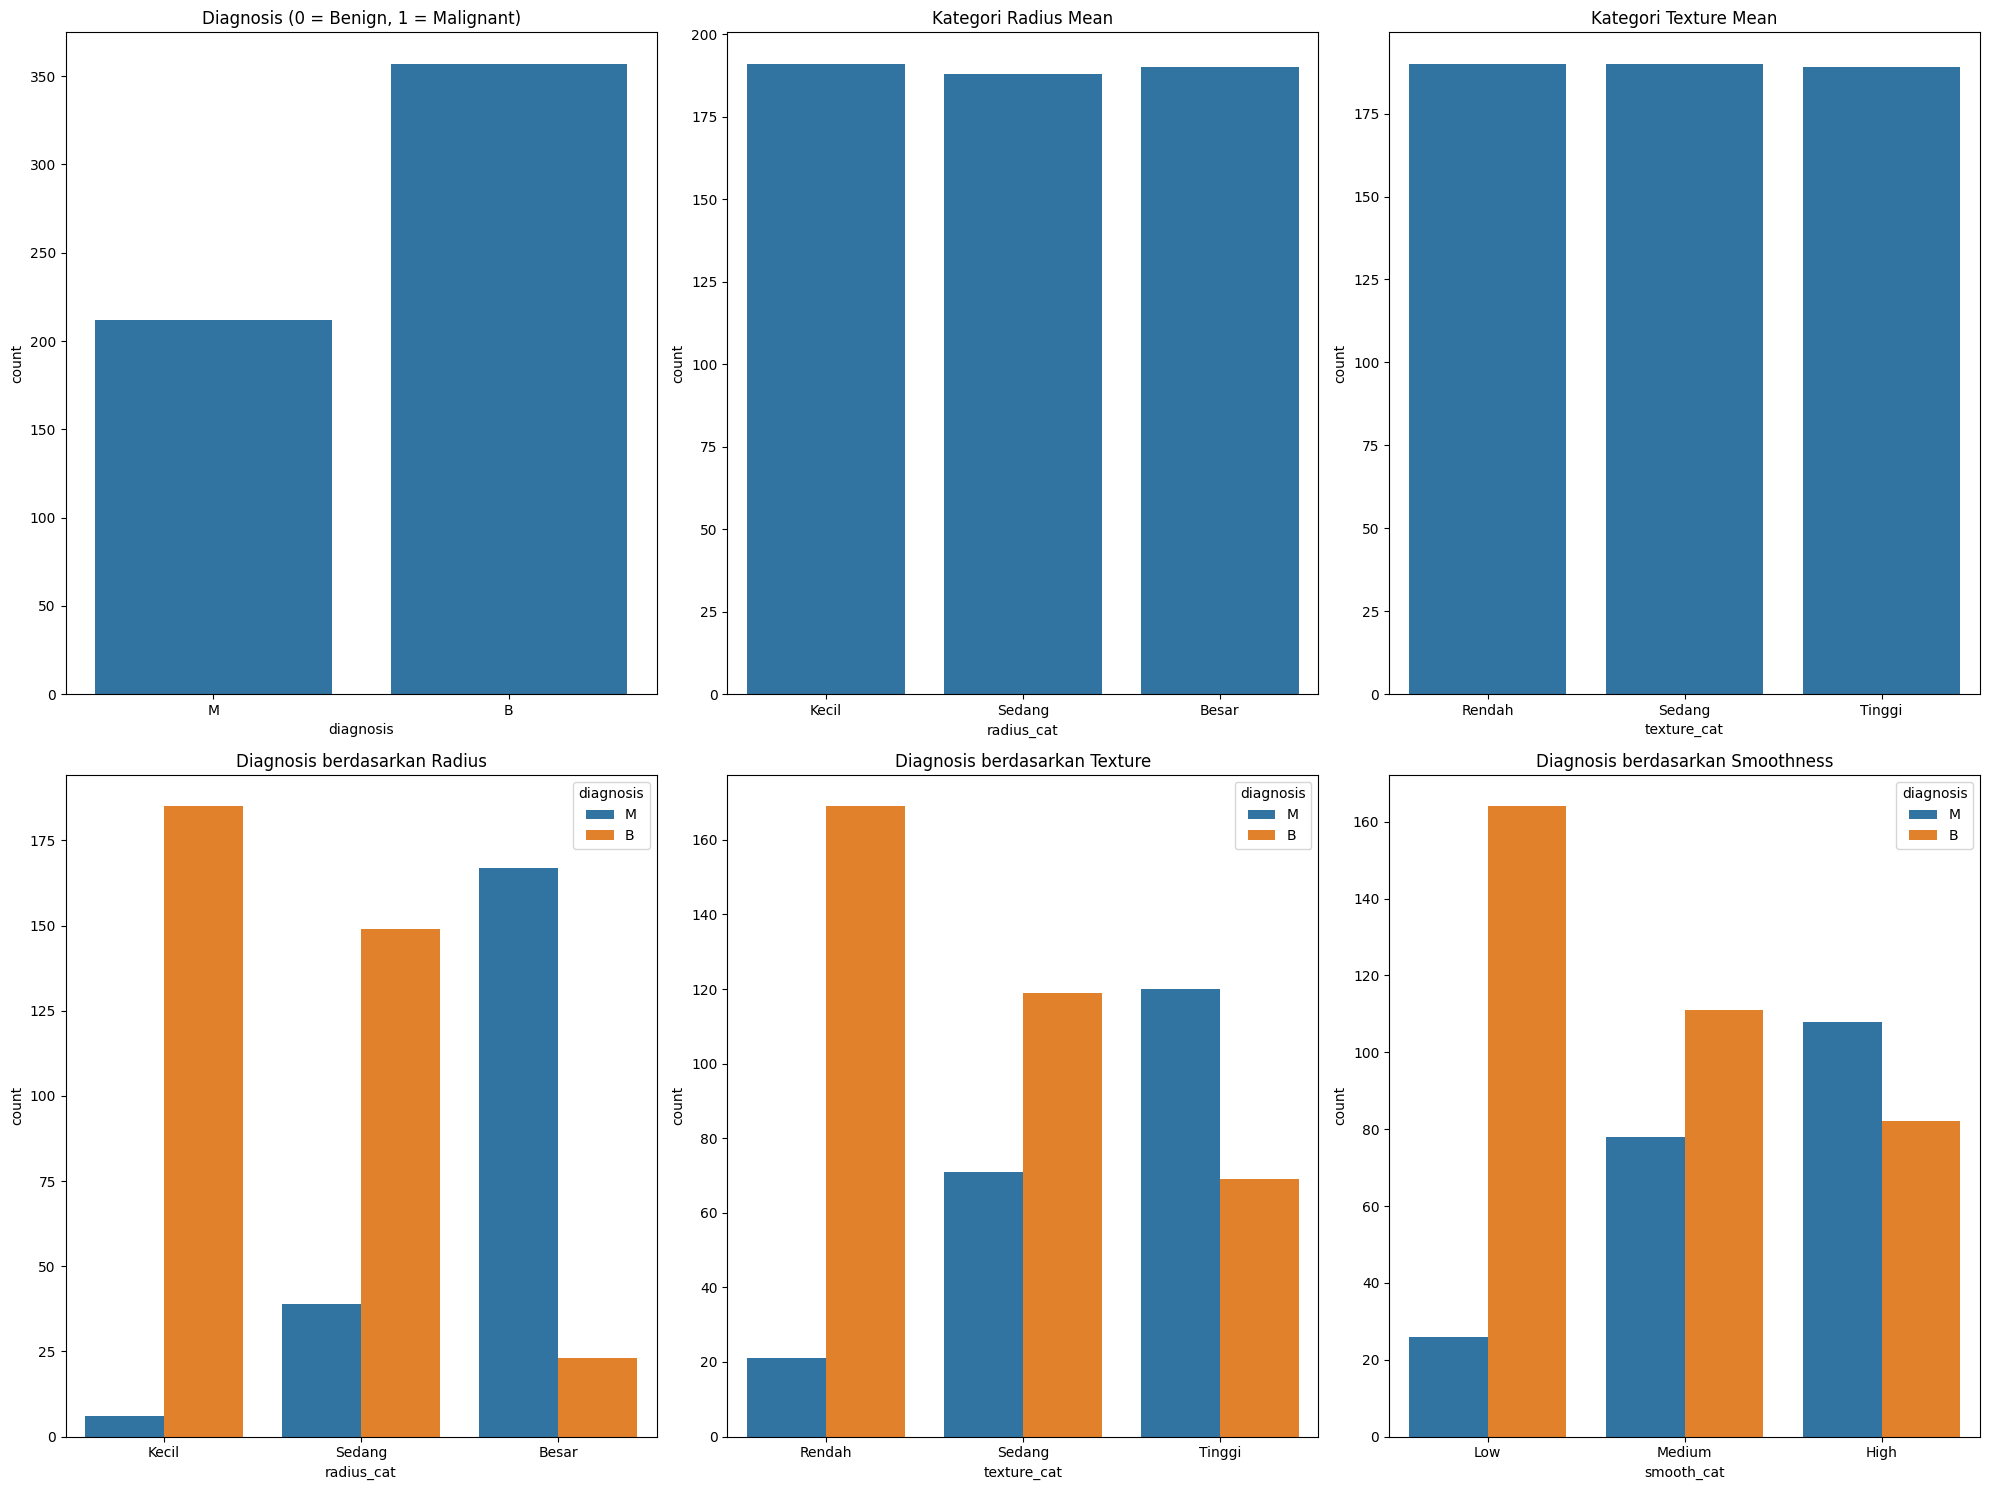

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# membuat grid 2x3
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20,15))
axes = axes.flatten()

#Countplot Diagnosis
sns.countplot(x='diagnosis', data=df, ax=axes[0])
axes[0].set_title('Diagnosis (0 = Benign, 1 = Malignant)')

#Distribusi radius_mean (dibuat kategori)
df['radius_cat'] = pd.qcut(df['radius_mean'], q=3, labels=['Kecil', 'Sedang', 'Besar'])
sns.countplot(x='radius_cat', data=df, ax=axes[1])
axes[1].set_title('Kategori Radius Mean')

#Distribusi texture_mean
df['texture_cat'] = pd.qcut(df['texture_mean'], q=3, labels=['Rendah', 'Sedang', 'Tinggi'])
sns.countplot(x='texture_cat', data=df, ax=axes[2])
axes[2].set_title('Kategori Texture Mean')

#Diagnosis berdasarkan Radius Category
sns.countplot(x='radius_cat', hue='diagnosis', data=df, ax=axes[3])
axes[3].set_title('Diagnosis berdasarkan Radius')

#Diagnosis berdasarkan Texture Category
sns.countplot(x='texture_cat', hue='diagnosis', data=df, ax=axes[4])
axes[4].set_title('Diagnosis berdasarkan Texture')

#Diagnosis berdasarkan Smoothness (dibinning agar kategori)
df['smooth_cat'] = pd.qcut(df['smoothness_mean'], q=3, labels=['Low', 'Medium', 'High'])
sns.countplot(x='smooth_cat', hue='diagnosis', data=df, ax=axes[5])
axes[5].set_title('Diagnosis berdasarkan Smoothness')

plt.tight_layout()
plt.show()


In [ ]:
# diagnosis: M = 1 (malignant), B = 0 (benign)
df['diagnosis'] = df['diagnosis'].map({'M':1, 'B':0})

print(df.head())

   diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0          1        17.99         10.38          122.80     1001.0   
1          1        20.57         17.77          132.90     1326.0   
2          1        19.69         21.25          130.00     1203.0   
3          1        11.42         20.38           77.58      386.1   
4          1        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  area_worst  smoothness_worst  compactness_worst  \
0         0.2419  ...      2019.0         

In [ ]:
#Separating X & Y
X = df.drop(columns=['diagnosis'])
Y = df['diagnosis']


In [ ]:
# Splitting data training dan testing
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42, stratify=Y
)


In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(569, 33) (455, 33) (114, 33)


In [ ]:
# Scalling Data
X_train = X_train.drop(columns=['radius_cat', 'texture_cat', 'smooth_cat'])
X_test = X_test.drop(columns=['radius_cat', 'texture_cat', 'smooth_cat'])

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train_scaled, Y_train)


GaussianNB()

In [ ]:
y_pred_train = nb.predict(X_train_scaled)
y_pred_test = nb.predict(X_test_scaled)

print("Training Accuracy :", accuracy_score(Y_train, y_pred_train))
print("Testing Accuracy  :", accuracy_score(Y_test, y_pred_test))


Training Accuracy : 0.945054945054945
Testing Accuracy  : 0.9210526315789473


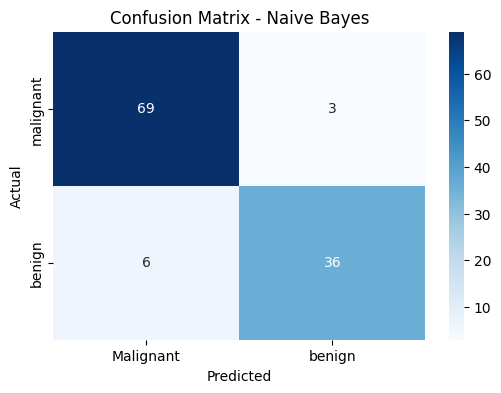

In [ ]:
# Visualisasi Confusion Matrix (Naive Bayes)
plt.figure(figsize=(6,4))
cm_nb = confusion_matrix(Y_test, y_pred_test)

sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Malignant', 'benign'],
            yticklabels=['malignant', 'benign'])

plt.title('Confusion Matrix - Naive Bayes')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()



In [ ]:
print("\nClassification Report (NB):")
print(classification_report(Y_test, y_pred_test))


Classification Report (NB):
              precision    recall  f1-score   support

           0       0.92      0.96      0.94        72
           1       0.92      0.86      0.89        42

    accuracy                           0.92       114
   macro avg       0.92      0.91      0.91       114
weighted avg       0.92      0.92      0.92       114



In [ ]:
from sklearn.model_selection import cross_val_score

# Drop the categorical columns from X before cross-validation
X_for_cv = X.drop(columns=['radius_cat', 'texture_cat', 'smooth_cat'])

cv_nb = cross_val_score(nb, X_for_cv, Y, cv=5, scoring='accuracy')
print("Naive Bayes Cross Validation Accuracy (5-Fold):")
print("Scores:", cv_nb)
print("Mean Accuracy:", cv_nb.mean())
print("Std Deviation:", cv_nb.std())

Naive Bayes Cross Validation Accuracy (5-Fold):
Scores: [0.92105263 0.92105263 0.94736842 0.94736842 0.95575221]
Mean Accuracy: 0.9385188635305075
Std Deviation: 0.014585994424363306
